In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [6]:
data = load_breast_cancer()
X, y = data.data, data.target

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create and train the XGBoost model
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, eval_metric='logloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [7]:
y_pred = model.predict(X_test)

Accuracy: 0.96

Classification Report:
               precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        43
      benign       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Predicted class for sample: benign


<Figure size 1000x800 with 0 Axes>

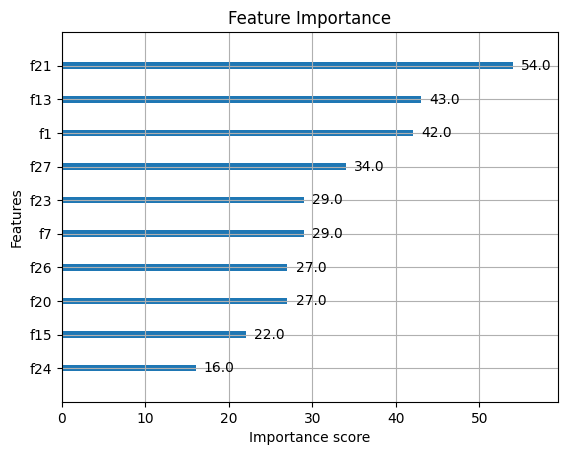

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))

#Predict a new sample (example)
sample = [X_test[0]]  # Take one sample from test set
prediction = model.predict(sample)
print(f"\nPredicted class for sample: {data.target_names[prediction[0]]}")

# Plot features importance
plt.figure(figsize=(10, 8))
plot_importance(model, max_num_features=10)  # Show top 10 important features
plt.title("Feature Importance")
plt.show()